#### Interlude on Energy minimizations, Hessian and Frequency calculation

Quantum chemistry calculations are a complicated and computationally expensive ordeal, however it is often useful to know what happens in the background.

Before we even start with frequency calculation, it is necessary to ensure we have obtained an equilibrium structure for our molecule.\
Geometry optimization is, on paper, a simple problem. We are trying to find a local minimum of energy, which is given as a function of positions, $E(r)$. 


For posterity we can also show a three dimensional case. Let us have an arbitrary quadratic function of three variables standing in as a potential energy surface:

$E(x,y,z)=2x^2+3y^2+3z^2+xy-2xz+4yz+2x+y+1$

(Plotted below for literally no reason)

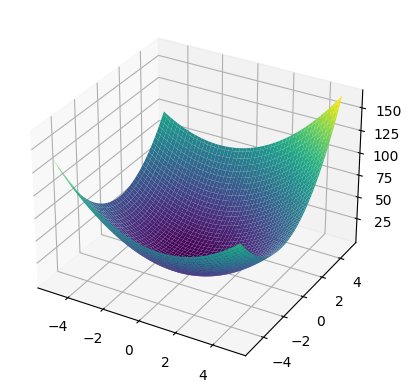

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def E(x, y, z):
    return 2*x**2 + 3*y**2 + 3*z**2 + x*y - 2*x*z + 4*y*z + 2*x + y + 1

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)

# 3D plots need a (x,y) meshgrid as basis
X, Y = np.meshgrid(x, y)
Z = E(X, Y, 0)  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


Gradient **g** of this function at the point $(x_0,y_0,z_0)$

$\nabla E = \big( \frac{\partial E}{\partial x}, \frac{\partial E}{\partial y}, \frac{\partial E}{\partial z} \big)$

$\frac{\partial E}{\partial x}=4x+y-2z+2 $

$\frac{\partial E}{\partial y}=x+6y+4z+1 $

$\frac{\partial E}{\partial z}=-2x+4y+6z $

$\nabla E(x,y,z)=(4x+y-2z+2,x+6y+4z+1,-2x+4y+6z)$

So for instance for a point $(1,1,1)$

$\nabla E(1,1,1)=(5,12,8)$

Hessian matrix **H**\
Hessian matrix is a square matrix of second-order partial derivates of a scalar function, whose determinant is called Hessian. Generally the Hessian matrix is used to determine function extrema, thus finds its use in quantum chemistry - characterizing extrema and curvature of the potential energy surface. 